[*********************100%***********************]  1 of 1 completed
1005
252


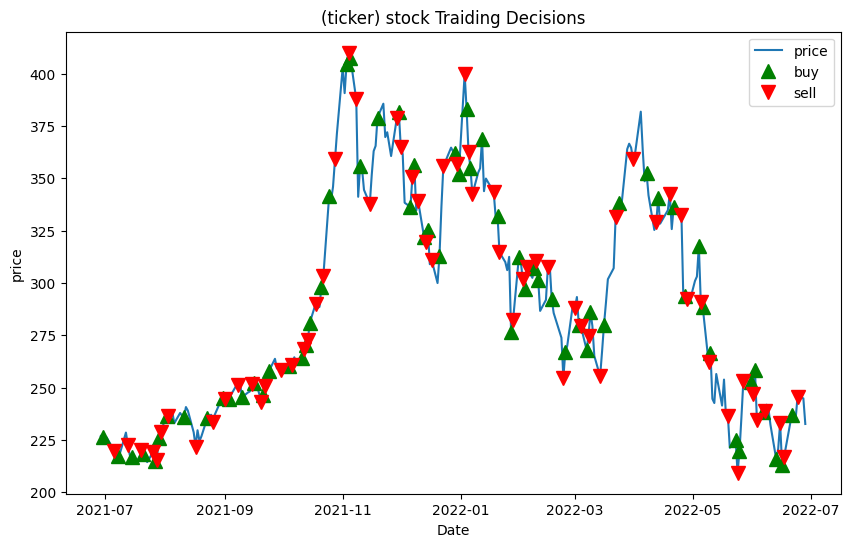

In [6]:
import yfinance as yf
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
ticker="TSLA"
start_date="2017-06-30"
end_date="2022-06-30"
data=yf.download(ticker,start=start_date,end=end_date)
data["Return"]=data["Close"].pct_change().shift(-1)
data.dropna(inplace=True)
x=np.array(data["Return"]).reshape(-1,1)
y=np.where(data["Return"].shift(-1)>0,1,0)
split=int(0.8*len(data))
print(split)
x_train ,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(len(y_pred))

buy_dates=[]
sell_dates=[]
buy_prices=[]
sell_prices=[]
shares=0
for i in range(len(y_pred)):
  if y_pred[i]==1:
    if shares==0:
      buy_dates.append(data.index[i+split])
      buy_prices.append(data['Close'][i+split])
    shares+=20000 /data['Close'][i+split]
  else:
    if shares>0:
      sell_dates.append(data.index[i+split])
      sell_prices.append(data['Close'][i+split])
    shares=0
plt.figure(figsize=(10,6))
plt.plot(data.index[split:],data['Close'][split:],label='price')
plt.plot(buy_dates,buy_prices,'g^',markersize=10,label='buy')
plt.plot(sell_dates,sell_prices,'rv',markersize=10,label='sell')
plt.legend()
plt.title(f"(ticker) stock Traiding Decisions")
plt.xlabel("Date")
plt.ylabel("price")
plt.show()